# Introduction to DBSCAN

visually exploring the differences between DBSCAN and other clustering techniques, such as K-Means Clustering.

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the datasets

In [2]:
blobs = pd.read_csv('../Data/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


Let's check how our data look like

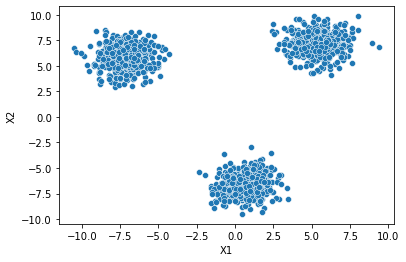

In [4]:
sns.scatterplot(data=blobs, x='X1', y='X2');

Let's explor another dataset.

In [5]:
moons = pd.read_csv('../Data/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


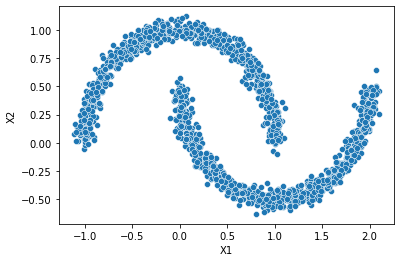

In [7]:
sns.scatterplot(data=moons, x="X1",  y='X2');

As we can see from moon dataset, the two tips of two crescents are pretty close to each other.

And we will see how Density based clustering (DBSCAN) and Distance based clustering (K-Means) handle these differently.

In [8]:
circles = pd.read_csv('../Data/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


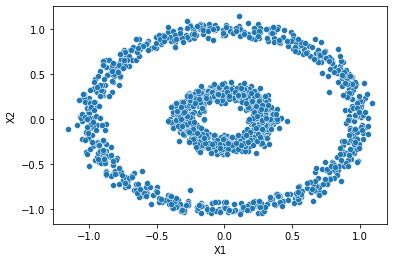

In [10]:
sns.scatterplot(data=circles, x='X1', y='X2');

-------

## Label Discovery

Now let's define a quick function which will allow us to train and visualize the clusters.

In [14]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1');

--------

# 1) K Means Results

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3)

#### blobs data

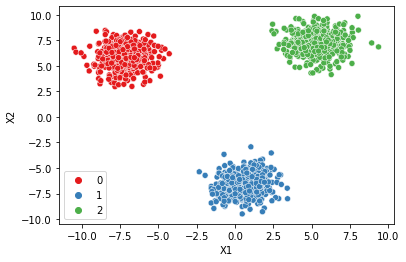

In [16]:
display_categories(model, blobs)

#### moon data

Now we can see for moon data, K-Means really can't figure it out. 

As tip of one crescent and the curve of another crescent are pretty close, the distance based algorithm K Means will cluster it together.

In [17]:
model = KMeans(n_clusters=2)

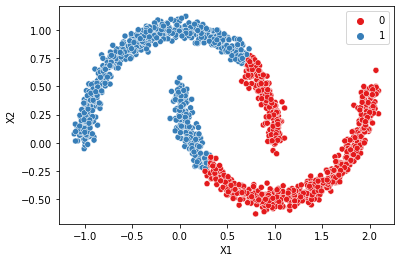

In [18]:
display_categories(model, moons)

#### circle data

similar thing happens with circles data. As K means is focusing on distance, the points are cut off based on the distance.

In [21]:
model = KMeans(n_clusters=2)

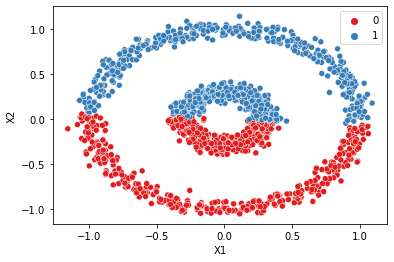

In [20]:
display_categories(model, circles)

--------

# 2) DBSCAN Results

Let's see how DBSCAN works for those data. As it is designed to look for the outliers which are not belonged in the clusters.

In [22]:
from sklearn.cluster import DBSCAN

In [25]:
# help(DBSCAN)

In [26]:
model = DBSCAN()

DBSCAN correctly cluster blobs.

We can also see that there is a special cluster `-1` which is for outliers. Based on the destiny metrics, they are not closed enough to the core of those blobs, they are considered as outliers. Note that we are using default values of hyperparameters.

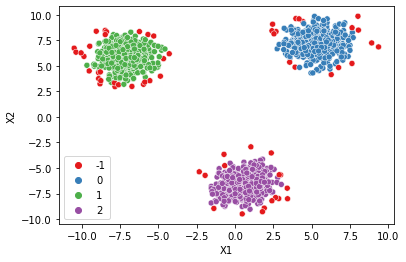

In [27]:
display_categories(model, blobs)

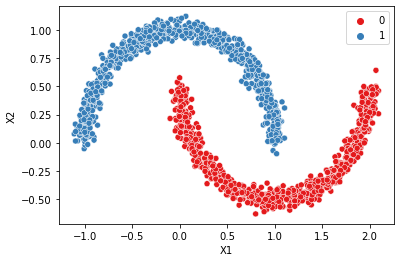

In [30]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

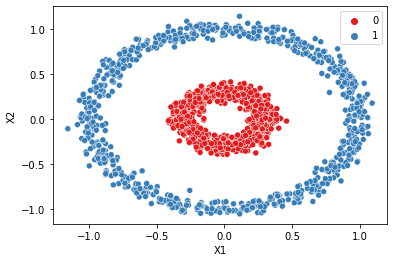

In [31]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)

Now we need to explore more about Hyperparameters.